In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dpks.interpretation import BootstrapInterpreter

from sklearn.datasets import make_classification

In [2]:
from dpks.quant_matrix import QuantMatrix

import pandas as pd
import numpy as np

In [3]:
design_matrix = pd.read_csv(
    "../tests/input_files/design_sepsis.tsv",
    #"/home/aaron/projects/dpks/notebooks/ml_api/covid_design_matrix.tsv",
    sep="\t"
)

In [4]:
design_matrix = design_matrix.sort_values("group", ascending=False).reset_index(drop=True)

In [5]:
#design_matrix['sample_num'] = design_matrix.index.values

Now, we simulate 3 groups in the data so we can perform multiple rounds of explanations

In [34]:
# design_matrix['group'] = np.where(
#     design_matrix['sample_num'] < 50, 3, design_matrix['group']
# )

In [7]:
design_matrix['group'].value_counts()

group
2    123
1     74
Name: count, dtype: int64

In [13]:
qm = QuantMatrix(
    quantification_file="../tests/input_files/data_sepsis.tsv",
    design_matrix_file=design_matrix
).filter().normalize(
        method="mean",
        use_rt_sliding_window_filter=True,
        rt_unit="second",
        stride=5,
        minimum_data_points=200,
    ).quantify(method="maxlfq", top_n=5).impute(method="neighborhood")

/home/aaron/projects/dpks/DPKS/dpks/quantification.py:275: NumbaTypeSafetyWarning: unsafe cast from uint64 to int64. Precision may be lost.
  grouping = mask_group(groupings[group_idx])


In [14]:
qm.to_df()

,Protein,TM_P1911_190,TM_P1912_030,TM_P1912_032,TM_P1912_033,TM_P1912_034,TM_M2012_102,TM_M2012_103,TM_M2012_104,TM_M2012_106,...,TM_M2012_143,TM_M2012_127,TM_M2012_142,TM_M2012_141,TM_M2012_140,TM_M2012_138,TM_M2012_046,TM_M2012_129,TM_M2012_128,TM_M2012_041
0,P08603,24.717230,25.494552,25.141237,25.540496,24.994147,26.092043,25.672870,25.430867,25.514954,...,25.210260,25.984396,26.114732,26.122828,26.209846,26.366222,25.477740,25.747256,25.898304,25.187179
1,P02671,30.034496,28.918791,29.690906,29.121366,28.902594,27.879669,29.483051,29.911103,29.237469,...,28.064970,29.967291,28.544386,28.316590,28.004205,28.561058,29.940752,29.552427,29.593817,29.688738
2,P01042,24.481048,25.266077,24.421696,24.983738,25.214760,25.979751,25.761774,25.531679,25.605163,...,25.252370,25.945718,26.008844,26.517554,26.186563,26.208556,25.745831,25.590381,25.709089,24.962298
3,P00450,26.061303,26.612764,26.140733,26.656094,26.744928,26.456966,26.593541,26.501464,26.620184,...,25.137898,26.358820,26.201240,26.192226,25.467209,26.076142,26.793905,25.879276,26.211713,26.671304
4,P05156,23.014848,21.919844,23.398637,22.557890,22.607112,21.639420,21.801436,21.523716,22.133912,...,21.505591,23.642180,22.138601,22.583829,22.565007,23.200379,23.396516,23.209370,23.334877,22.487851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,P07333,19.759348,20.422480,19.659375,20.489971,20.294608,19.679646,19.873758,19.554750,19.405891,...,19.425559,18.920279,19.997434,18.548479,19.805635,19.404250,18.573160,18.893584,19.013321,18.037868
550,Q06323,18.681479,18.118377,18.497750,18.918493,18.401925,19.146209,18.391366,17.477954,18.067339,...,18.997520,18.072808,19.264701,18.530119,18.928317,19.837256,17.656086,17.866512,18.346884,17.651603
551,P16035,18.432887,18.516401,19.119242,18.687431,18.983767,18.320305,17.798199,18.588628,18.349684,...,19.383494,18.374109,18.270185,18.423804,19.477035,17.711620,19.744360,17.705238,17.456515,17.911868
552,O95633,17.707762,18.127397,17.755561,18.034071,17.624851,18.470644,17.704543,17.894956,17.453883,...,19.062819,16.623635,20.326704,20.444891,19.592011,19.881807,17.884090,18.095404,16.797726,17.481988


In [15]:
qm_decoys_added = qm.append(
    method="shuffle",
    feature_column="Protein"
)

In [16]:
qm_decoys_added.sample_annotations

,sample,group
sample,,
TM_P1911_190,TM_P1911_190,2
TM_P1912_030,TM_P1912_030,2
TM_P1912_032,TM_P1912_032,2
TM_P1912_033,TM_P1912_033,2
TM_P1912_034,TM_P1912_034,2
...,...,...
TM_M2012_138,TM_M2012_138,1
TM_M2012_046,TM_M2012_046,1
TM_M2012_129,TM_M2012_129,1


In [17]:
qm_decoys_added = qm_decoys_added.compare(
    method="linregress",
    min_samples_per_group=2,
    comparisons=[(2, 1)]
)

In [18]:
qm_decoys_added.row_annotations

,Protein,Decoy,DEScore2-1,Group2Mean,Group1Mean,Group2Stdev,Group1Stdev,Log2FoldChange2-1,PValue2-1,Group2RepCounts,Group1RepCounts,CorrectedPValue2-1,-Log10CorrectedPValue2-1
0,P08603,0,0.018481,25.702930,25.733270,0.397006,0.432812,-0.030340,0.618039,123,74,0.574474,0.240730
1,P02671,0,0.037551,29.490347,29.424444,0.615070,0.795177,0.065902,0.518053,123,74,0.529300,0.276298
2,P01042,0,0.023464,25.622400,25.583334,0.435524,0.484683,0.039066,0.561823,123,74,0.548266,0.261009
3,P00450,0,0.069428,26.835505,26.728021,0.426089,0.511117,0.107484,0.115588,123,74,0.202033,0.694578
4,P05156,0,0.074842,23.281418,23.157433,0.631588,0.494956,0.123985,0.152697,123,74,0.246254,0.608617
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,decoy_P07333,1,0.013394,19.332377,19.308489,0.714906,0.740345,0.023888,0.823805,123,74,0.664623,0.177425
1104,decoy_Q06323,1,0.062462,18.301635,18.407716,0.643692,0.579719,-0.106081,0.248984,123,74,0.345811,0.461161
1105,decoy_P16035,1,0.079668,18.396142,18.532025,0.701996,0.637893,-0.135883,0.177270,123,74,0.274837,0.560924
1106,decoy_O95633,1,0.089920,17.470955,17.313528,0.856852,0.775616,0.157428,0.199647,123,74,0.302496,0.519281


In [19]:
data = qm_decoys_added.row_annotations[~qm_decoys_added.row_annotations['CorrectedPValue2-1'].isna()]

In [20]:
data

,Protein,Decoy,DEScore2-1,Group2Mean,Group1Mean,Group2Stdev,Group1Stdev,Log2FoldChange2-1,PValue2-1,Group2RepCounts,Group1RepCounts,CorrectedPValue2-1,-Log10CorrectedPValue2-1
0,P08603,0,0.018481,25.702930,25.733270,0.397006,0.432812,-0.030340,0.618039,123,74,0.574474,0.240730
1,P02671,0,0.037551,29.490347,29.424444,0.615070,0.795177,0.065902,0.518053,123,74,0.529300,0.276298
2,P01042,0,0.023464,25.622400,25.583334,0.435524,0.484683,0.039066,0.561823,123,74,0.548266,0.261009
3,P00450,0,0.069428,26.835505,26.728021,0.426089,0.511117,0.107484,0.115588,123,74,0.202033,0.694578
4,P05156,0,0.074842,23.281418,23.157433,0.631588,0.494956,0.123985,0.152697,123,74,0.246254,0.608617
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,decoy_P07333,1,0.013394,19.332377,19.308489,0.714906,0.740345,0.023888,0.823805,123,74,0.664623,0.177425
1104,decoy_Q06323,1,0.062462,18.301635,18.407716,0.643692,0.579719,-0.106081,0.248984,123,74,0.345811,0.461161
1105,decoy_P16035,1,0.079668,18.396142,18.532025,0.701996,0.637893,-0.135883,0.177270,123,74,0.274837,0.560924
1106,decoy_O95633,1,0.089920,17.470955,17.313528,0.856852,0.775616,0.157428,0.199647,123,74,0.302496,0.519281


In [21]:
import xgboost

from sklearn.linear_model import LogisticRegression
# 
clf = xgboost.XGBClassifier(
    max_depth=2,
    #subsample=0.5,
    reg_lambda=2,
    objective="binary:logistic",
    seed=42
)

#
qm_decoys_added = qm_decoys_added.explain(
    clf,
    comparisons=[(2, 1)],
    n_iterations=10,
    downsample_background=True
)

<Axes: xlabel='Log2FoldChange2-1', ylabel='-Log10CorrectedPValue2-1'>

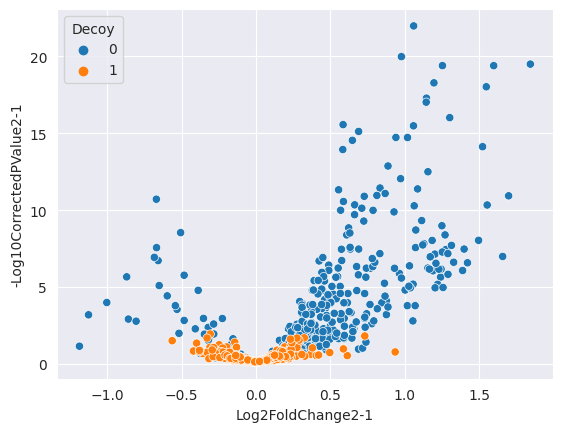

In [22]:
import seaborn as sns


sns.scatterplot(
    data=data,
    x="Log2FoldChange2-1",
    y="-Log10CorrectedPValue2-1",
    hue="Decoy"
)

In [23]:
qm_decoys_added.row_annotations

,Protein,Decoy,DEScore2-1,Group2Mean,Group1Mean,Group2Stdev,Group1Stdev,Log2FoldChange2-1,PValue2-1,Group2RepCounts,Group1RepCounts,CorrectedPValue2-1,-Log10CorrectedPValue2-1,MeanImportance2-1,MeanRank2-1
0,P08603,0,0.018481,25.702930,25.733270,0.397006,0.432812,-0.030340,0.618039,123,74,0.574474,0.240730,0.002917,523.20
1,P02671,0,0.037551,29.490347,29.424444,0.615070,0.795177,0.065902,0.518053,123,74,0.529300,0.276298,0.005953,521.50
2,P01042,0,0.023464,25.622400,25.583334,0.435524,0.484683,0.039066,0.561823,123,74,0.548266,0.261009,0.000000,577.50
3,P00450,0,0.069428,26.835505,26.728021,0.426089,0.511117,0.107484,0.115588,123,74,0.202033,0.694578,0.001009,523.95
4,P05156,0,0.074842,23.281418,23.157433,0.631588,0.494956,0.123985,0.152697,123,74,0.246254,0.608617,0.000000,577.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,decoy_P07333,1,0.013394,19.332377,19.308489,0.714906,0.740345,0.023888,0.823805,123,74,0.664623,0.177425,0.000000,577.50
1104,decoy_Q06323,1,0.062462,18.301635,18.407716,0.643692,0.579719,-0.106081,0.248984,123,74,0.345811,0.461161,0.000000,577.50
1105,decoy_P16035,1,0.079668,18.396142,18.532025,0.701996,0.637893,-0.135883,0.177270,123,74,0.274837,0.560924,0.000000,577.50
1106,decoy_O95633,1,0.089920,17.470955,17.313528,0.856852,0.775616,0.157428,0.199647,123,74,0.302496,0.519281,0.000000,577.50


In [24]:
qm_decoys_added = qm_decoys_added.evaluate(
    comparisons=[(2, 1)],
    method="basic"
)

In [25]:
qm_decoys_added = qm_decoys_added.annotate()

In [26]:
qm_decoys_added.row_annotations

,Protein,Decoy,DEScore2-1,Group2Mean,Group1Mean,Group2Stdev,Group1Stdev,Log2FoldChange2-1,PValue2-1,Group2RepCounts,Group1RepCounts,CorrectedPValue2-1,-Log10CorrectedPValue2-1,MeanImportance2-1,MeanRank2-1,FeatureScore2-1,FeatureQValue2-1,Gene
0,P08603,0,0.018481,25.702930,25.733270,0.397006,0.432812,-0.030340,0.618039,123,74,0.574474,0.240730,0.002917,523.20,1.908355,0.063882,CFH
1,P02671,0,0.037551,29.490347,29.424444,0.615070,0.795177,0.065902,0.518053,123,74,0.529300,0.276298,0.005953,521.50,2.486351,0.050802,FGA
2,P01042,0,0.023464,25.622400,25.583334,0.435524,0.484683,0.039066,0.561823,123,74,0.548266,0.261009,0.000000,577.50,-2.368641,0.321669,KNG1
3,P00450,0,0.069428,26.835505,26.728021,0.426089,0.511117,0.107484,0.115588,123,74,0.202033,0.694578,0.001009,523.95,2.204360,0.051151,CP
4,P05156,0,0.074842,23.281418,23.157433,0.631588,0.494956,0.123985,0.152697,123,74,0.246254,0.608617,0.000000,577.50,-0.582505,0.194296,CFI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,decoy_P07333,1,0.013394,19.332377,19.308489,0.714906,0.740345,0.023888,0.823805,123,74,0.664623,0.177425,0.000000,577.50,-3.711118,0.422149,decoy_P07333
1104,decoy_Q06323,1,0.062462,18.301635,18.407716,0.643692,0.579719,-0.106081,0.248984,123,74,0.345811,0.461161,0.000000,577.50,-6.363330,0.494959,decoy_Q06323
1105,decoy_P16035,1,0.079668,18.396142,18.532025,0.701996,0.637893,-0.135883,0.177270,123,74,0.274837,0.560924,0.000000,577.50,-3.504830,0.407240,decoy_P16035
1106,decoy_O95633,1,0.089920,17.470955,17.313528,0.856852,0.775616,0.157428,0.199647,123,74,0.302496,0.519281,0.000000,577.50,-2.654551,0.353690,decoy_O95633


<Axes: xlabel='FeatureScore2-1', ylabel='Count'>

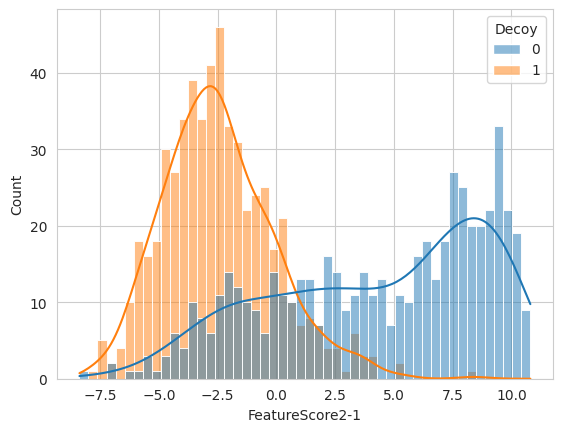

In [30]:
sns.histplot(
    data=qm_decoys_added.row_annotations,
    x="FeatureScore2-1",
    hue="Decoy",
    bins=50,
    kde=True
)

In [31]:
qm_decoys_added.row_annotations[qm_decoys_added.row_annotations['FeatureQValue2-1'] < 0.01]

,Protein,Decoy,DEScore2-1,Group2Mean,Group1Mean,Group2Stdev,Group1Stdev,Log2FoldChange2-1,PValue2-1,Group2RepCounts,Group1RepCounts,CorrectedPValue2-1,-Log10CorrectedPValue2-1,MeanImportance2-1,MeanRank2-1,FeatureScore2-1,FeatureQValue2-1,Gene
15,P04196,0,0.210773,23.534359,23.855153,0.666040,0.636404,-0.320793,1.104703e-03,123,74,4.149120e-03,2.382044,0.001332,523.75,6.777182,0.004566,HRG
16,P01833,0,0.707350,22.027196,20.953406,1.075195,1.042950,1.073790,1.053046e-10,123,74,1.959156e-09,8.707931,0.000000,577.50,10.371638,0.000000,PIGR
17,P35527,0,0.382484,20.688055,20.049413,1.035920,1.155607,0.638642,9.343848e-05,123,74,4.503059e-04,3.346492,0.000000,577.50,10.573139,0.000000,KRT9
18,P00751,0,0.206996,26.015466,25.719176,0.445415,0.735839,0.296290,5.712524e-04,123,74,2.343599e-03,2.630117,0.008825,521.80,7.646940,0.005618,CFB
19,P19823,0,0.608742,24.334025,25.003292,0.674176,0.408300,-0.669267,7.084782e-13,123,74,1.954423e-11,10.708982,0.116911,296.65,9.029871,0.000000,ITIH2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,P18136,0,0.296800,20.691010,20.215393,0.906371,0.763869,0.475617,2.252262e-04,123,74,1.006598e-03,2.997144,0.015572,521.50,8.722883,0.000000,IGKV3-20
549,P07333,0,0.634471,19.596648,18.869227,0.683424,0.539688,0.727421,4.429690e-13,123,74,1.265626e-11,10.897695,0.000000,577.50,9.284357,0.000000,CSF1R
550,Q06323,0,0.142036,18.425463,18.201893,0.539980,0.718290,0.223570,1.452033e-02,123,74,3.747182e-02,1.426295,0.000000,577.50,6.687769,0.004464,PSME1
924,decoy_P01771,1,0.407382,22.921219,22.190107,1.597439,1.944459,0.731112,4.868526e-03,123,74,1.492269e-02,1.826153,0.000000,577.50,5.293444,0.007194,decoy_P01771


In [32]:
qm_decoys_added.row_annotations.sort_values("FeatureScore2-1", ascending=False).head(50)

,Protein,Decoy,DEScore2-1,Group2Mean,Group1Mean,Group2Stdev,Group1Stdev,Log2FoldChange2-1,PValue2-1,Group2RepCounts,Group1RepCounts,CorrectedPValue2-1,-Log10CorrectedPValue2-1,MeanImportance2-1,MeanRank2-1,FeatureScore2-1,FeatureQValue2-1,Gene
208,P22692,0,0.691034,19.985819,19.152588,0.724479,0.666611,0.833231,1.007109e-13,123,74,3.662214e-12,11.436256,0.000000,577.50,10.805468,0.0,IGFBP4
153,P07998,0,0.845006,20.363348,19.208112,0.876759,1.007010,1.155236,8.053944e-15,123,74,3.221578e-13,12.491931,0.000000,577.50,10.672481,0.0,RNASE1
237,P00995,0,0.384026,19.386549,18.772347,0.897836,1.016737,0.614203,1.788473e-05,123,74,1.021984e-04,3.990556,0.000000,577.50,10.588916,0.0,SPINK1
314,P12111,0,0.666757,18.647786,17.835543,0.725729,0.666394,0.812242,3.607431e-13,123,74,1.109979e-11,10.954685,0.000000,577.50,10.578657,0.0,COL6A3
147,P08571,0,1.051167,21.900222,20.923072,0.644745,0.457096,0.977151,2.686496e-23,123,74,1.074598e-20,19.968754,0.359305,7.70,10.578362,0.0,CD14
17,P35527,0,0.382484,20.688055,20.049413,1.035920,1.155607,0.638642,9.343848e-05,123,74,4.503059e-04,3.346492,0.000000,577.50,10.573139,0.0,KRT9
78,P05362,0,1.226461,20.411176,18.814095,1.149072,0.596157,1.597082,2.600109e-22,123,74,4.160174e-20,19.380888,0.454335,6.00,10.491785,0.0,ICAM1
151,P16070,0,1.153378,20.519783,19.460412,0.619233,0.539891,1.059371,1.363022e-25,123,74,1.090417e-22,21.962407,0.316675,182.85,10.472633,0.0,CD44
336,P01708,0,0.271600,20.545216,20.091700,1.063568,0.704675,0.453516,1.378038e-03,123,74,5.057019e-03,2.296105,0.000000,577.50,10.450536,0.0,IGLV2-11
16,P01833,0,0.707350,22.027196,20.953406,1.075195,1.042950,1.073790,1.053046e-10,123,74,1.959156e-09,8.707931,0.000000,577.50,10.371638,0.0,PIGR


In [33]:
qm_decoys_added.row_annotations.sort_values("MeanImportance2-1", ascending=False).head(50)

,Protein,Decoy,DEScore2-1,Group2Mean,Group1Mean,Group2Stdev,Group1Stdev,Log2FoldChange2-1,PValue2-1,Group2RepCounts,Group1RepCounts,CorrectedPValue2-1,-Log10CorrectedPValue2-1,MeanImportance2-1,MeanRank2-1,FeatureScore2-1,FeatureQValue2-1,Gene
231,P59665,0,1.332764,23.165443,21.322102,1.244589,0.869829,1.843341,1.236229e-22,123,74,3.296611e-20,19.481932,0.682111,61.15,10.057733,0.000000,DEFA1
78,P05362,0,1.226461,20.411176,18.814095,1.149072,0.596157,1.597082,2.600109e-22,123,74,4.160174e-20,19.380888,0.454335,6.00,10.491785,0.000000,ICAM1
147,P08571,0,1.051167,21.900222,20.923072,0.644745,0.457096,0.977151,2.686496e-23,123,74,1.074598e-20,19.968754,0.359305,7.70,10.578362,0.000000,CD14
41,P06727,0,0.743395,25.263452,24.200472,0.895952,1.053316,1.062980,2.159639e-12,123,74,5.235489e-11,10.281043,0.358234,8.20,9.562277,0.000000,APOA4
151,P16070,0,1.153378,20.519783,19.460412,0.619233,0.539891,1.059371,1.363022e-25,123,74,1.090417e-22,21.962407,0.316675,182.85,10.472633,0.000000,CD44
234,P13611,0,1.045516,20.256379,19.060833,0.860840,0.554742,1.195546,4.068965e-21,123,74,5.425287e-19,18.265577,0.279669,64.25,9.510196,0.000000,VCAN
329,P55058,0,0.785451,21.326890,20.241003,0.819699,1.065939,1.085887,1.206840e-13,123,74,4.197704e-12,11.376988,0.266086,11.10,10.232253,0.000000,PLTP
59,Q08380,0,0.495937,21.404185,20.662807,0.922929,0.832160,0.741378,6.094513e-08,123,74,5.874230e-07,6.231049,0.264684,179.10,10.086708,0.000000,LGALS3BP
347,P08493,0,0.510063,19.440490,18.750346,0.797531,0.651096,0.690144,2.436195e-09,123,74,3.381355e-08,7.470909,0.171255,127.65,9.751852,0.000000,MGP
35,P61626,0,0.755713,21.306696,20.419709,0.660038,0.762594,0.886986,3.238479e-15,123,74,1.363570e-13,12.865323,0.161478,181.80,9.944113,0.000000,LYZ
